## フーリエ変換　ローパスフィルター

In [14]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DFT hyper-parameters
K, L = 128, 128
channel = 3

# bgr-> gray
def bgr2gray(img):
    gray = 0.2126*img[:,:, 2] + 0.7152*img[:,:, 1] + 0.0722*img[:,:, 0]
    return gray

# DFT
def dft(img):
    # prepare DFT coefficient
    G = np.zeros((L, K, channel), dtype=np.complex)  # np.complex 複素数
    
    # prepare processed index corresponding to original image positions
    x = np.tile(np.arange(W), (H, 1))
    y = np.arange(H).repeat(W).reshape(H, -1)
    
    # dft
    for c in range(channel):
        for l in range(L):
            for k in range(K):
                G[l, k, c] = np.sum(img[:,:,c]*np.exp(-2j*np.pi*(x*k/K+y*l/L))) / np.sqrt(K*L)
                
    return G

# IDFT
def idft(G):
    # prepare out image
    H, W, _ = G.shape
    out = np.zeros((H, W, channel), dtype=np.float32)
    
    # prepare processed index corresponding to original image positions
    x = np.tile(np.arange(W), (H,1))
    y = np.arange(H).reshape(W).reshape(H, -1)
    
    # idft
    for c in range(channel):
        for l in range(H):
            for k in range(W):
                out[l, k, c] = np.abs(np.sum(G[:,:,c]*np.exp(2j*np.pi*(x*k/W + y*l/H)))) / np.sqrt(W*H)
                
    # clipping
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    
    return out

# LPF
def lpf(G, ratio=0.5):
    H, W, _ = G.shape
    
    # transfer positions
    # 元のGを入れ替えるのではなくて、_Gに移動したものを入れていく
    _G = np.zeros_like(G)
    _G[:H//2, :W//2] = G[H//2:, W//2:]  # ①に④を入れる
    _G[:H//2, W//2:] = G[H//2:, :W//2]  # ②に③を入れる
    _G[H//2:, :W//2] = G[:H//2, W//2:]  # ③に②を入れる
    _G[H//2:, W//2:] = G[:H//2, :W//2]  # ④に①を入れる
    
    # get distance from center (H/2, W/2)
    x = np.tile(np.arange(W), (H, 1))
    y = np.arange(H).repeat(W).reshape(H, -1)
    
    _x = x - W//2
    _y = y - H//2
    r = np.sqrt(_x**2 + _y**2)  # ここで各座標と中心の距離を求めている
    
    # make filter
    mask = np.ones((H,W), dtype=np.float32)  # imageと同じ形のmaskを作る
    mask[r>(W//2*ratio)] = 0  # 中心からの距離がW//2*ratioに満たない座標のmaskは０
    
    mask = np.repeat(mask, channel).reshape(H, W,  channel)
    
    # filtering
    _G *= mask
    
    # reverse original positions
    G[:H//2, :W//2] = _G[H//2:, W//2:]  # ①に④を入れる
    G[:H//2, W//2:] = _G[H//2:, :W//2]  # ②に③を入れる
    G[H//2:, :W//2] = _G[:H//2, W//2:]  # ③に②を入れる
    G[H//2:, W//2:] = _G[:H//2, :W//2]  # ④に①を入れる
    
    return G

# read image
img = cv2.imread('../imori.jpg').astype(np.float32)
H, W, C = img.shape

# Glay scale
gray = bgr2gray(img)

# DFT
G = dft(img)

# LPF
G = lpf(G)

# IDFT
out = idft(G)


# できてる！！！

True

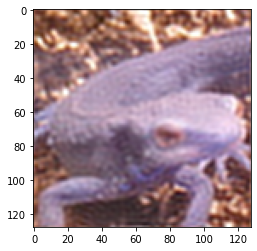

In [15]:
plt.imshow(out)
cv2.imwrite('out33.jpg', out)

In [8]:

K, L = 128,128
#H, W, C = 128,128,3
x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)
G = np.zeros((L, K, channel), dtype=np.complex) 



for c in range(C):
    for l in range(L):
        for k in range(K):
            G = np.exp(-2j*np.pi*(x*k/K+y*l/L))
        
print(G.shape)

(128, 128)
